## 1. Análise exploratória dos dados.

Nesta análise inicial, carregamos o dataset e realizamos uma investigação preliminar para compreender a estrutura e as características dos dados.

O objetivo da análise exploratória é obter uma visão geral do conjunto de dados, identificar padrões, detectar possíveis inconsistências ou outliers, verificar a presença de valores ausentes e compreender as distribuições das variáveis. Essa etapa é essencial para embasar decisões sobre tratamentos de dados, escolhas de modelos e abordagens analíticas nas etapas seguintes.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
datasetPath = '../../data/drinks.csv'
df = pd.read_csv(datasetPath)   

O atributo ```shape``` do DataFrame indica quantas linhas e colunas existem no dataset.

In [3]:
dataset_lines, dataset_columns = df.shape
print("O dataset possui {} linhas e {} colunas.".format(dataset_lines, dataset_columns))

O dataset possui 193 linhas e 5 colunas.


O método ```head()``` retorna, por padrão, as 5 primeiras linhas do DataFrame.

Essa visualização inicial é útil para obter uma noção rápida da estrutura dos dados, incluindo os nomes das colunas, os tipos de valores armazenados e o formato geral do dataset. Isso auxilia na identificação preliminar de possíveis problemas, como valores ausentes, colunas irrelevantes ou dados inconsistentes.

In [4]:
df.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


Aqui verificamos se há apenas um registro para cada país.

In [5]:
print(f"Coluna 'country' possui {df['country'].nunique()} valores únicos.")

Coluna 'country' possui 193 valores únicos.


O atributo ```dtypes``` exibe o tipo de dado de cada coluna do DataFrame, como ```int64```, ```float64```, ```object``` (para strings), entre outros.

Essa informação é essencial para entender como os dados estão representados internamente e para garantir que cada coluna tenha o tipo adequado para as análises futuras, como cálculos numéricos, agrupamentos ou conversões de dados.

In [6]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

O método ```describe()``` fornece um resumo estatístico das colunas numéricas do DataFrame.

Ele retorna métricas como contagem, média, desvio padrão, valores mínimo e máximo, e os quartis (25%, 50%, 75%), permitindo uma visão geral da distribuição dos dados. Essas informações ajudam a identificar tendências, variabilidade e possíveis outliers nas variáveis numéricas.

In [7]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


A instrução ```df.isna().sum()``` verifica a presença de valores ausentes (NaN) em cada coluna do DataFrame.

Ela retorna a contagem de valores nulos por coluna, permitindo identificar variáveis que podem precisar de tratamento, como preenchimento, exclusão ou substituição. Essa análise é fundamental para garantir a qualidade dos dados antes de prosseguir com etapas mais avançadas.

In [8]:
df.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

A matriz de correlação é uma estrutura que exibe o grau de relação entre variáveis numéricas do dataset, utilizando coeficientes de correlação (geralmente de Pearson).

Os valores variam de -1 a 1:

* 1 indica correlação positiva perfeita (as variáveis crescem juntas),

* -1 indica correlação negativa perfeita (uma cresce enquanto a outra diminui),

* 0 indica ausência de correlação linear.

Essa matriz é útil para identificar variáveis fortemente relacionadas, o que pode orientar decisões sobre seleção de features ou indicar redundância nos dados.

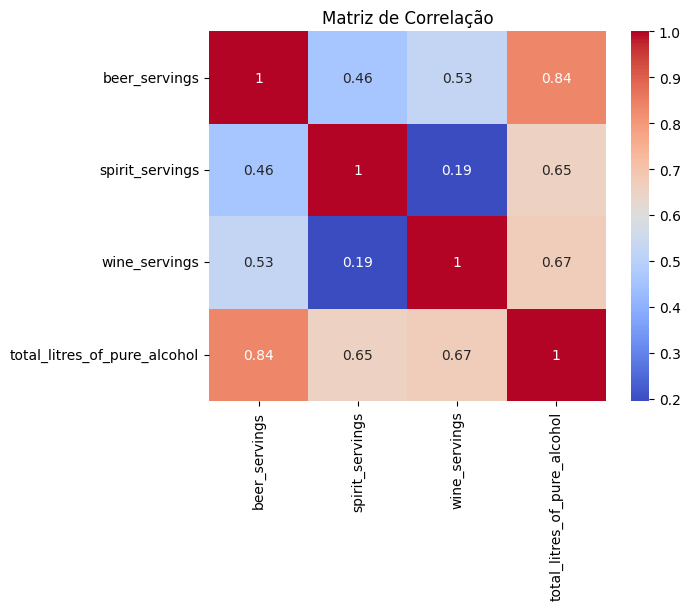

In [9]:
df_correlation = df.corr(numeric_only=True)

sns.heatmap(df_correlation, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()